# Initial EDA
### Case Study 5, DAEN 400
October 31st, 2025

In [2]:
# Imports
import pandas as pd

In [3]:
zillow_df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [11]:
df_long = zillow_df[zillow_df['RegionName'] == 76065]

In [15]:
# Suppose your DataFrame is called df
# Identify the non-date columns (you said there are 9 of them)
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Melt (unpivot) the DataFrame
df = df_long.melt(
    id_vars=non_date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convert the Date column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with NaN in Date (if there were any non-date columns that slipped in)
df = df.dropna(subset=['Date', 'ZHVI']).reset_index(drop=True)


In [ ]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI
0,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-01-31,188438.751221
1,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-02-28,188099.168468
2,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-03-31,187923.385526
3,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-04-30,187400.473974
4,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-05-31,186960.172194
...,...,...,...,...,...,...,...,...,...,...,...
196,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-05-31,453405.242441
197,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-06-30,452048.962695
198,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-07-31,450995.150491
199,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-08-31,450762.653868


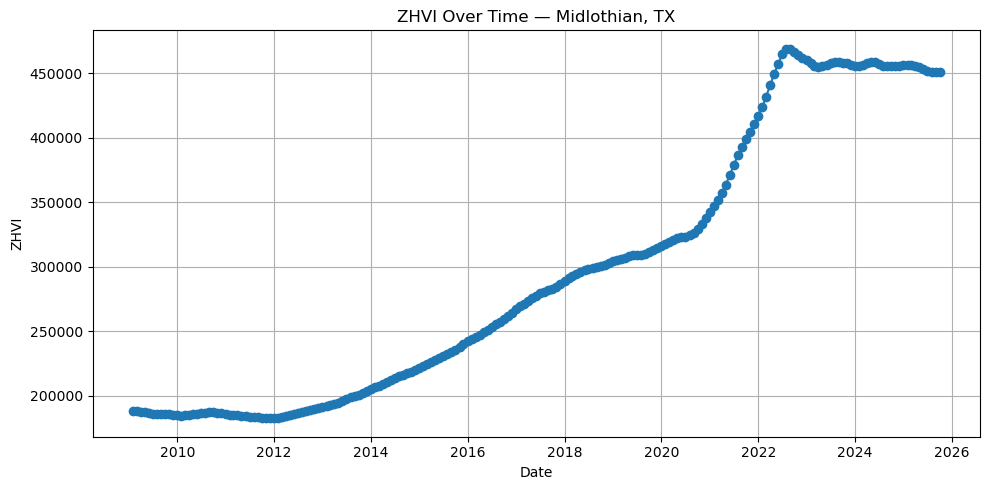

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['ZHVI'], marker='o')
plt.title(f"ZHVI Over Time — {df.loc[0, 'City']}, {df.loc[0, 'State']}")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.show()
